Name: Arpan Das

Roll No.: 302211001012

Group: A2

UG3, Information Technology

**Problem Statement:**

Imagine a world that is much more exciting than the one with the three toy blocks. This world consists of five beer bottles A, B, C, D, and E (Amstel, Becks, Corona, Duff, and Edelweiss). They can be arranged in any order from left to right, except that bottles A and E can never be in the middle.


For example, ABCDE, CEBAD, and CADBE are possible states of our world, whereas DCEBA, CDABE, or BCEDA can never occur.

The world can be manipulated by the schema swap (x, y), which swaps the bottles in positions x and y. For example, swap (1, 2) turns state BECAD into EBCAD. However, any combination of two numbers (between 1 to 5) for swaps is possible.

a. Draw the state-space graph of this world. You do not need to draw any bottles; just use five-letter sequences to describe states.

b. Assume that your world is in the state ABCDE, but you would like it to be in the state CEBAD. Use iterative deepening and iterative lengthening search to find a solution that requires a minimum number of operations.

Import the NetworkX library for creating and manipulating graphs

Import the Matplotlib library for plotting graphs

Import the deque class from the collections module for efficient queue operations

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [ ]:
def is_valid(state):
    # A and E cannot be in the middle
    return state[2] not in ['A', 'E']

def get_neighbors(state):
    neighbors = []
    for i in range(5):
        for j in range(i+1, 5):
            # Swap positions i and j
            new_state = list(state)
            new_state[i], new_state[j] = new_state[j], new_state[i]
            if is_valid(new_state):
                neighbors.append(''.join(new_state))
    return neighbors

In [ ]:
def create_graph(start):
    G = nx.Graph()
    queue = deque([start])
    visited = set([start])
    while queue:
        state = queue.popleft()
        for neighbor in get_neighbors(state):
            if neighbor not in visited:
                G.add_edge(state, neighbor)
                queue.append(neighbor)
                visited.add(neighbor)
    return G

In [ ]:
# Swap function
def swap(state, x, y):
    state_list = list(state)
    state_list[x], state_list[y] = state_list[y], state_list[x]
    return ''.join(state_list)

# Check if a state is valid (A and E can't be in the middle)
def is_valid(state):
    middle_index = len(state) // 2
    return state[middle_index] not in ('A', 'E')

# Generate successors by applying all possible swaps
def generate_successors(state):
    successors = []
    for i in range(len(state)):
        for j in range(len(state)):
            if i != j:
                new_state = swap(state, i, j)
                if is_valid(new_state):
                    successors.append(new_state)
    return successors

Depth-Limited Search Function
The depth_limited_search function is a crucial component of the state space search algorithms implemented in the script. This function performs a depth-limited exploration of the state space, attempting to find a solution path from an initial state to a goal state within a specified depth limit. This approach prevents exhaustive search and manages computational complexity by restricting the search depth.

In [ ]:
# Depth-limited search
def depth_limited_search(state, goal_state, depth_limit):
    if state == goal_state:
        return [state]
    if depth_limit == 0:
        return None

    for successor in generate_successors(state):
        result = depth_limited_search(successor, goal_state, depth_limit - 1)
        if result is not None:
            return [state] + result

    return None

Iterative Deepening Search Function
The iterative_deepening_search function is a key element in the state space search script, implementing an approach known as Iterative Deepening Search (IDS). This search strategy combines the advantages of both breadth-first and depth-first searches, allowing for efficient exploration of the state space while ensuring that the optimal solution is found.

In [ ]:
# Iterative deepening search
def iterative_deepening_search(start_state, goal_state, max_depth):
    for depth in range(max_depth + 1):
        result = depth_limited_search(start_state, goal_state, depth)
        if result is not None:
            return result
    return None

Iterative Lengthening Search Function
The iterative_lengthening_search function plays a significant role in the state space search script, implementing the concept of Iterative Lengthening Search (ILS). This search strategy aims to find a solution path by incrementally increasing the depth limit while conducting depth-limited searches in each iteration.

In [ ]:
# Iterative lengthening search
def iterative_lengthening_search(start_state, goal_state):
    depth = 0
    while True:
        result = depth_limited_search(start_state, goal_state, depth)
        if result is not None:
            return result
        depth += 1

In [ ]:
# Get user input for initial and goal states
while True:
    start_state = input("Enter the initial state (ABCDE): ")
    if len(start_state) == 5 and all(bottle in 'ABCDE' for bottle in start_state):
        if is_valid(start_state):
            break
        else:
            print("Invalid input: A or E cannot be in the middle of the state.")
    else:
        print("Invalid input: Please enter a valid 5-letter state using A, B, C, D, and E.")

while True:
    goal_state = input("Enter the goal state (CEBAD): ")
    if len(goal_state) == 5 and all(bottle in 'ABCDE' for bottle in goal_state):
        if is_valid(goal_state):
            break
        else:
            print("Invalid input: A or E cannot be in the middle of the state.")
    else:
        print("Invalid input: Please enter a valid 5-letter state using A, B, C, D, and E.")

# Choose search method using a switch-like block
while True:
    search_method = input("Choose search method (1 for Iterative Deepening, 2 for Iterative Lengthening): ")
    if search_method == '1':
        max_depth = int(input("Enter max depth for Iterative Deepening: "))
        solution = iterative_deepening_search(start_state, goal_state, max_depth)
        break
    elif search_method == '2':
        solution = iterative_lengthening_search(start_state, goal_state)
        break
    else:
        print("Invalid choice. Enter '1' for Iterative Deepening or '2' for Iterative Lengthening.")

# Write the solution steps to a file
if solution is not None:
    output_file = "solution_steps.txt"
    with open(output_file, "w") as f:
        f.write("Solution found:\n")
        for i, state in enumerate(solution):
            f.write(f"Step {i}: {state}\n")
    print(f"Solution steps written to {output_file}")
else:
    print("No solution found.")

Enter the initial state (ABCDE): ABDEC
Enter the goal state (CEBAD): DACBE
Choose search method (1 for Iterative Deepening, 2 for Iterative Lengthening): 1
Enter max depth for Iterative Deepening: 100
Solution steps written to solution_steps.txt


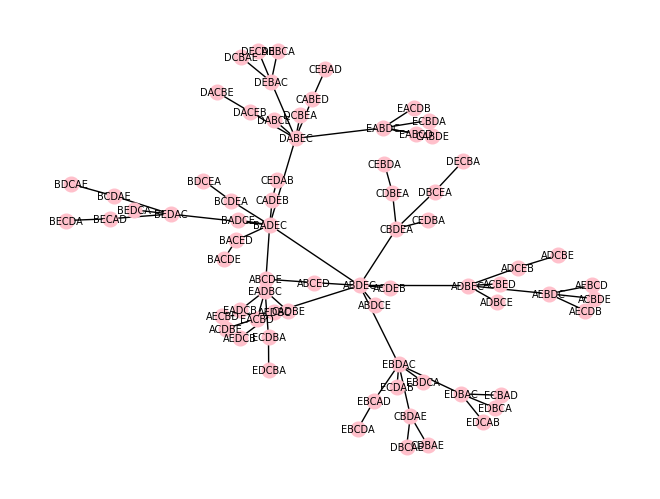

In [ ]:
G = create_graph(start_state)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=111, font_size=7, node_color='pink')

# Save the figure to a file
plt.savefig('graph.png')

[Google drive link of Solution File](https://drive.google.com/file/d/1VV4rX7E-1mnPItkG7HvPW6Fzk08hUe2I/view)

[Google Drive link of state space graph](https://drive.google.com/file/d/1Pc3a-mjhyFyjoKCbl3ttIjyj4auQBbuV/view)

### Script Structure

1. **Import Statements**: The script begins with importing the necessary libraries: `networkx` for graph operations and `matplotlib.pyplot` for visualization.

2. **Function Definitions**: The script defines several functions to support the state space search and graph creation:
   - `is_valid(state)`: Checks if a given state is valid based on the constraint.
   - `get_neighbors(state)`: Generates valid neighboring states by swapping two elements.
   - `create_graph(start)`: Generates a graph representation of the state space using NetworkX.

3. **Search Algorithms**: The script implements depth-limited search, iterative deepening search, and iterative lengthening search algorithms. These functions are essential for finding a solution path within the state space.

4. **Graph Visualization**: The script defines a function `visualize_state_space_graph(graph)` to visualize the state space graph using NetworkX and Matplotlib.

5. **User Input and Interaction**: The user is prompted to input the initial and goal states. The script performs input validation to ensure the entered states are valid according to the constraints.

6. **Search Method Selection**: The user is given the choice to use either iterative deepening search or iterative lengthening search methods.

7. **Solution Generation**: The chosen search method is executed, and a solution path is generated if found. The steps of the solution path are written to a text file.

8. **Graph Creation and Visualization**: The state space graph is generated using the `create_graph` function, and the graph is visualized using NetworkX and Matplotlib. The visualization is saved as an image file (`graph.png`).

### Usage

1. Run the script in a Python environment.
2. Enter the initial state (ABCDE) and goal state (CEBAD) as prompted. The input is validated to ensure it meets the constraints.
3. Choose a search method: 1 for Iterative Deepening Search or 2 for Iterative Lengthening Search.
4. If a solution is found, the script writes the solution steps to a text file (`solution_steps.txt`).
5. The script generates a graph of the state space and saves it as an image (`graph.png`).